Motivated by the example in Chapter 5 of Kevin Murphy's MLaPP

Suppose there are two sellers on Amazon, Seller 1 has 90 positive reviews and 10 negative reviewes, Seller 2 has 2 positive reviewes and 0 negative reviewes. Which one should we trust more?

We will use Bayesian approach to deal with the problem. We use Beta distribution to model the positive rates ${\theta_1}$ and $\theta_2$, and use an uninformative prior for both sellers, meaning $\theta_i \sim \text{Beta}(1,1)$. 

The posterior for Seller 1 is $p(\theta_i | \mathcal{D}_1) = \text{Beta}(91, 11)$, and for Seller 2, $p(\theta_2) = \text{Beta}(3, 1)$.

In [16]:
import numpy as np
import scipy.stats 
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sbn
%matplotlib inline
matplotlib.style.use('ggplot')

In [53]:
beta1 = scipy.stats.beta(a=91, b=11)
beta2 = scipy.stats.beta(a=3, b=1)

x = np.linspace(0, 1, 10000)
dist1 = beta1.pdf(x)
dist2 = beta2.pdf(x)

# Draw random samples from these two distributions, respectively.
# For each draw, compute the difference between these two rv's 
Nsample = 1000
sample1 = beta1.rvs(size=Nsample)
sample2 = beta2.rvs(size=Nsample)

delta = sample1 - sample2

lower_bound = np.percentile(delta, 2.5)
upper_bound = np.percentile(delta, 97.5)

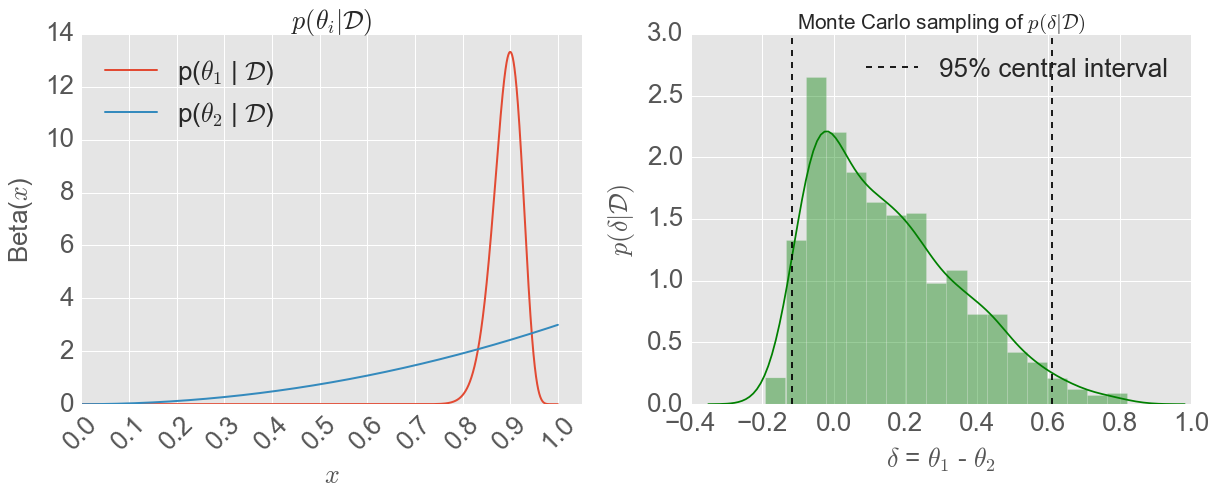

In [54]:
FONTSIZE = 26
plt.close('all')
fig = plt.figure(figsize=(17, 7))
gs = matplotlib.gridspec.GridSpec(1, 2, width_ratios=[1, 1])

# Plot the distribution of these two Beta distribution
ax = plt.subplot(gs[0, 0])
ax.set_xlabel(r'$x$', fontsize=FONTSIZE, labelpad=10)
ax.set_ylabel(r'Beta($x$)', fontsize=FONTSIZE, labelpad=10)
ax.set_xlim(0, 1.05)
ax.set_xticks(np.arange(0, XMAX, 0.1))
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(FONTSIZE)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(FONTSIZE)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_rotation(45)
ax.set_title(r'$p(\theta_i | \mathcal{D})$', fontsize=FONTSIZE)
p1, = ax.plot(x, dist1, lw=2)
p2, = ax.plot(x, dist2, lw=2)
l = plt.legend((p1, p2), 
               (r'p($\theta_1$ | $\mathcal{D}$)', r'p($\theta_2$ | $\mathcal{D}$)'), 
               fontsize=FONTSIZE, loc='best')


# Plot the histogram of the differences
ax = plt.subplot(gs[0, 1])
kde_fit = sbn.distplot(delta, ax=ax, label='KDE', color='g')
au, = ax.plot([lower_bound, lower_bound], [0, 1000], color='k', linestyle='--')
ax.plot([upper_bound, upper_bound], [0, 1000], color='k', linestyle='--')
ax.set_ylim(0, 3.0)
ax.set_xlabel(r'$\delta$ = $\theta_1$ - $\theta_2$', fontsize=FONTSIZE, labelpad=10)
ax.set_ylabel(r'$p(\delta | \mathcal{D})$', fontsize=FONTSIZE, labelpad=10)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(FONTSIZE)
    tick.label.set_rotation(0)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(FONTSIZE)
    tick.label.set_rotation(0) 
ax.set_title(r'Monte Carlo sampling of $p(\delta | \mathcal{D})$', fontsize=FONTSIZE*0.8)
l = ax.legend([au], ['95% central interval'], fontsize=FONTSIZE, loc='best')
plt.tight_layout(w_pad=2.5, h_pad=1)

In [58]:
frac = np.sum(delta >= 0)/len(delta)
print(r'p(delta > 0|D)={0:2f}'.format(frac))

p(delta > 0|D)=0.710000
